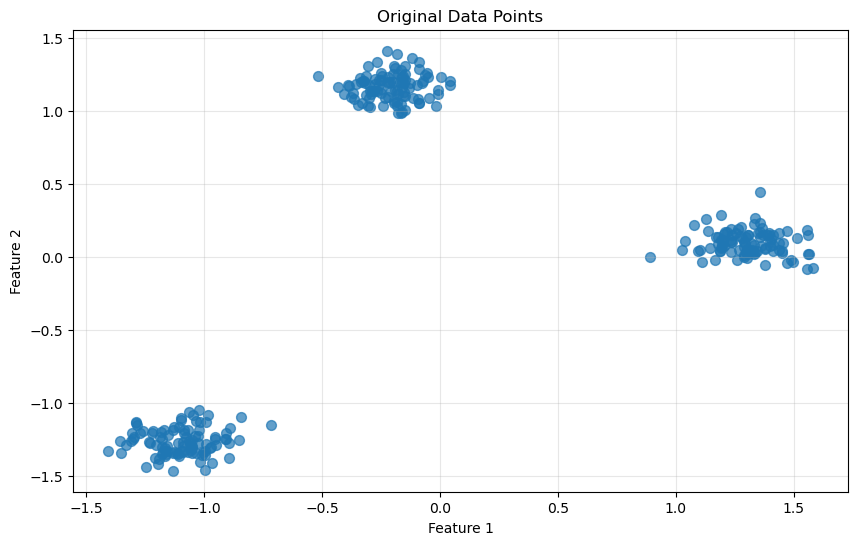

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for better understanding
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])

# Visualize the original data
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, alpha=0.7)
plt.title('Original Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

In [2]:
# Import K-means from scikit-learn
from sklearn.cluster import KMeans

# Create a K-means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model to our data
kmeans.fit(X_scaled)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

# Add cluster labels to our DataFrame
df['Cluster'] = cluster_labels

# Display the first few rows with cluster assignments
print(df.head())

# Count the number of points in each cluster
print("\nPoints per cluster:")
print(df['Cluster'].value_counts())

   Feature 1  Feature 2  Cluster
0  -1.155697  -1.333552        1
1  -1.205642  -1.291013        1
2  -0.088934   1.054459        0
3   1.265373   0.193633        2
4  -1.352308  -1.348019        1

Points per cluster:
Cluster
1    100
0    100
2    100
Name: count, dtype: int64


c:\Users\fyzan\miniconda3\envs\sts_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


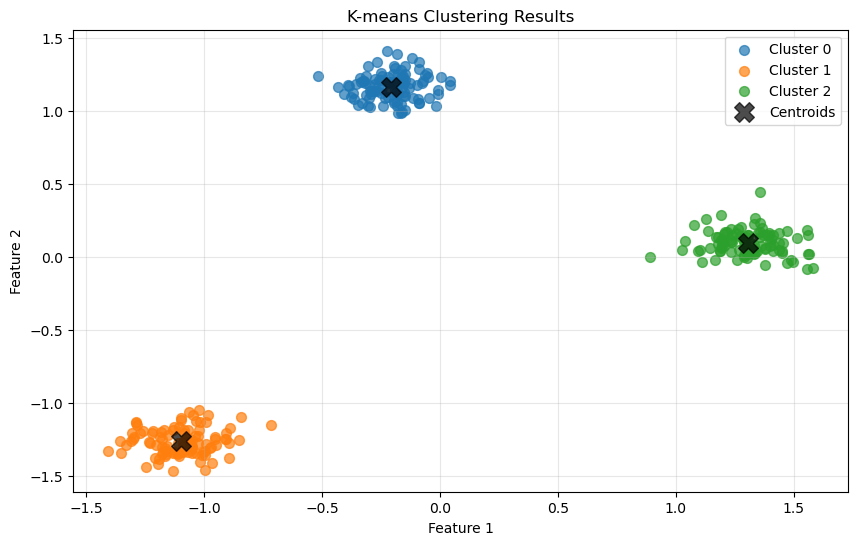

In [4]:
# Plot the clusters with different colors
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster_num in range(3):
    # Get points in this cluster
    cluster_points = X_scaled[cluster_labels == cluster_num]
    # Plot these points
    plt.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1],
        s=50, 
        alpha=0.7,
        label=f'Cluster {cluster_num}'
    )

# Plot the centroids
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='black', 
    s=200, 
    alpha=0.7, 
    marker='X',
    label='Centroids'
)

plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

New point 1 [0.5 0.5] belongs to Cluster 2
New point 2 [-2. -2.] belongs to Cluster 1
New point 3 [ 2. -1.] belongs to Cluster 2


C:\Users\fyzan\AppData\Local\Temp\ipykernel_1660\4096391515.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


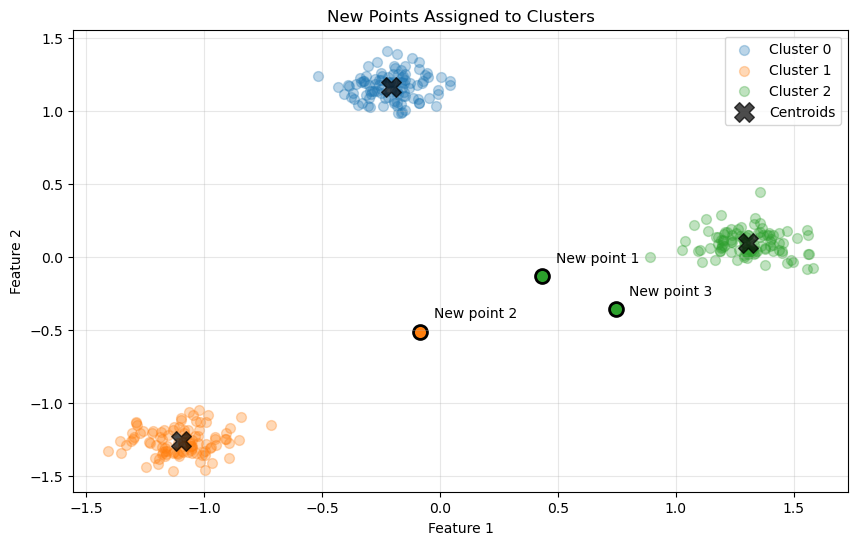

In [5]:
# Create some new data points
new_points = np.array([
    [0.5, 0.5],   # Should be close to one cluster
    [-2, -2],     # Should be close to another cluster
    [2, -1]       # Should be close to the third cluster
])

# Scale the new points using the same scaler
new_points_scaled = scaler.transform(new_points)

# Predict which cluster each new point belongs to
new_clusters = kmeans.predict(new_points_scaled)

# Display the results
for i, (point, cluster) in enumerate(zip(new_points, new_clusters)):
    print(f"New point {i+1} {point} belongs to Cluster {cluster}")

# Visualize the new points with the existing clusters
plt.figure(figsize=(10, 6))

# Plot existing clusters
for cluster_num in range(3):
    cluster_points = X_scaled[cluster_labels == cluster_num]
    plt.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1],
        s=50, 
        alpha=0.3,  # Make original points transparent
        label=f'Cluster {cluster_num}'
    )

# Plot centroids
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='black', 
    s=200, 
    alpha=0.7, 
    marker='X',
    label='Centroids'
)

# Plot new points with their predicted clusters (using the same colors)
for i, (point, cluster) in enumerate(zip(new_points_scaled, new_clusters)):
    plt.scatter(
        point[0], 
        point[1], 
        c=plt.cm.tab10(cluster), 
        s=100, 
        alpha=1.0,
        edgecolors='black',
        linewidths=2,
        marker='o'
    )
    plt.annotate(f'New point {i+1}', (point[0], point[1]), 
                 xytext=(10, 10), textcoords='offset points')

plt.title('New Points Assigned to Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


c:\Users\fyzan\miniconda3\envs\sts_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fyzan\miniconda3\envs\sts_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fyzan\miniconda3\envs\sts_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fyzan\miniconda3\envs\sts_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

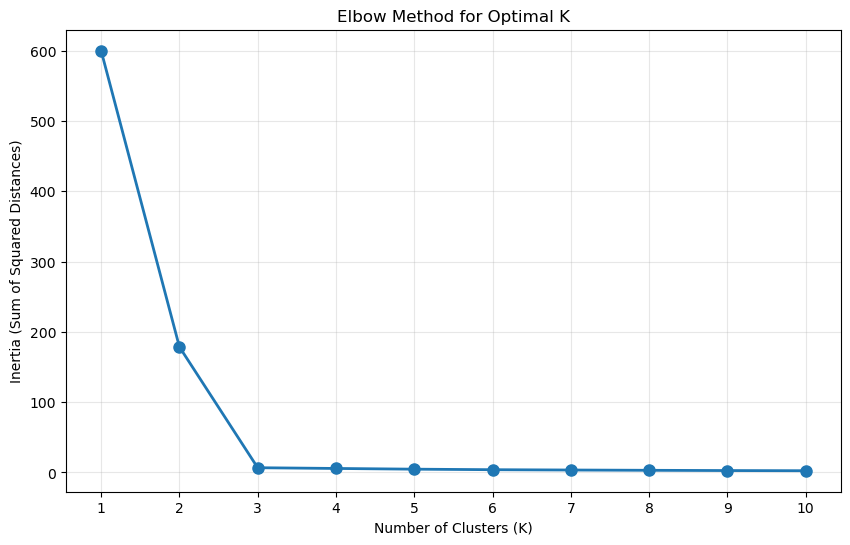

Looking at the elbow curve:
- The 'elbow' is where the inertia starts decreasing more slowly
- This suggests the optimal number of clusters
- In this example, K=3 appears to be a good choice


In [ ]:
# Calculate inertia for different values of K
inertia_values = []
k_values = range(1, 11) # 1, 2, 3, 4, ... 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, 'o-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Explain the results
print("Looking at the elbow curve:")
print("- The 'elbow' is where the inertia starts decreasing more slowly")
print("- This suggests the optimal number of clusters")
print("- In this example, K=3 appears to be a good choice")